<a href="https://colab.research.google.com/github/fridaruh/Curso_Intro_AI_Crehana/blob/master/Crehana_PLN_tweets_de_Black_Friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [1]:
import tweepy
import pandas as pd
import datetime

In [13]:
startDate = datetime.datetime(2021, 11, 22, 0, 0, 0)
endDate = datetime.datetime(2021, 11, 28, 0, 0, 0)

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [5]:
api = tweepy.API(auth)

In [33]:
twitter_users = []
tweet_time = []
tweet_string = []

for tweet in tweepy.Cursor(api.search, q='cinepolis', count=1000).items(1000):
  if (not tweet.retweeted) and ('RT @' not in tweet.text):
    if tweet.lang == 'es':
      twitter_users.append(tweet.user.name)
      tweet_time.append(tweet.created_at)
      tweet_string.append(tweet.text)

Ejemplo cambiando parámetros:

In [29]:
twitter_users_2 = []
tweet_time_2 = []
tweet_string_2 = []

for tweet in tweepy.Cursor(api.search, q='@Fridaruh').items():
  if (not tweet.retweeted) and ('RT @' not in tweet.text):
    if tweet.lang == 'en':
      twitter_users_2.append(tweet.user.name)
      tweet_time_2.append(tweet.created_at)
      tweet_string_2.append(tweet.text)

In [34]:
df = pd.DataFrame({'name':twitter_users, 'time':tweet_time, 'tweet':tweet_string })

In [35]:
df.shape

(282, 3)

Exportamos el dataframe a un archivo csv

In [36]:
df.to_csv('tweets_cinepolis.csv')

En caso de que no tengas acceso a la API, tendrás que ejecutar esta celda donde importas el archivo csv

In [17]:
df = pd.read_csv('/content/tweets_cinepolis.csv')

In [37]:
df.head()

,name,time,tweet
0,み┋sᴏ፝֟ғɪᴀ⟭⟬💙,2022-03-13 01:32:54,@Cinepolis Gracias a ustedes fue una experienc...
1,María⁷ l PTD on Seoul,2022-03-13 01:32:53,"amixes, ya no puedo hablar #cinepolis #PTD_ON_..."
2,⁷𝕿𝖘.٭,2022-03-13 01:32:52,@gigi7taetae @Cinepolis Hasta con el gerente f...
3,Adamav,2022-03-13 01:32:52,"@Cinepolis GRACIAS A TI, POR SOPORTARNOS, AYUD..."
4,AvvButterfly 💜✨ aleja ✨ trying to stay alive,2022-03-13 01:32:49,"Hermoso todo, recién llegando a casa, orgullos..."


Convierto los tweets a listas

In [38]:
data = df['tweet'].to_list()

In [39]:
data

['@Cinepolis Gracias a ustedes fue una experiencia inolvidable 😭💗 https://t.co/LOy7ckohFh',
 'amixes, ya no puedo hablar #cinepolis #PTD_ON_STAGE_SEOUL',
 '@gigi7taetae @Cinepolis Hasta con el gerente fui, si se pudo amigx 🥴',
 '@Cinepolis GRACIAS A TI, POR SOPORTARNOS, AYUDARNOS Y DARNOS LA MEJOR EXPERIENCIA. GRANDES FAMILIA. PD: Gracias Joel. 💜💜💜💜💜🌹',
 'Hermoso todo, recién llegando a casa, orgullosa de Army Argentina que bailo, canto, y todo con mucho respeto… https://t.co/Pk1ZieBubW',
 'Medio pedorro tu combo pero gracias por el concierto 🥺💜 https://t.co/zUcoEtEq1g',
 '@Cinepolis Gracias tío Cinépolis, estuvo hermoso el concierto ✨💜💜 https://t.co/WaDNkaMabW',
 '@Cinepolis Gracias a ustedes, por hacer realidad el sueño de ARMY 💜💜💜💜💜💜✨✨✨',
 '@Cinepolis Con toda la actitud....  aunque pedí mi boleto conmemorativo y los pases 😭😭😭😭😭 https://t.co/zCxDHqAafd',
 '@Cinepolis Muchas gracias 🌞',
 '@Cinepolis Gracias 💕💕💕💕',
 '@Cinepolis Améeee el concierto...que se repita siempre...👏👏👏',
 '@Ci

In [40]:
pattern = r'''(?x)                  # Flag para iniciar el modo verbose
              (?:[A-Z]\.)+          # Hace match con abreviaciones como U.S.A.
              | \w+(?:-\w+)*        # Hace match con palabras que pueden tener un guión interno
              | \$?\d+(?:\.\d+)?%?  # Hace match con dinero o porcentajes como $15.5 o 100%
              | \.\.\.              # Hace match con puntos suspensivos
              | [][.,;"'?():-_`]    # Hace match con signos de puntuación
'''

In [41]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [42]:
texto = []

for x in range(0, len(data)):
  token_1 = data[x].lower()
  token_2 = nltk.regexp_tokenize(token_1, pattern)
  texto.append(token_2)

In [43]:
#texto es una lista de listas 

In [44]:
#texto

In [45]:
flatten = [w for l in texto for w in l]

In [46]:
import string
puntuacion = list(string.punctuation)

In [47]:
puntuacion

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [48]:
puntuacion.append('https')
puntuacion.append('co')
puntuacion.append('t')

In [49]:
puntuacion

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'https',
 'co',
 't']

In [50]:
nltk.download('stopwords')
stop_words_n = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [51]:
df_2 = [w for w in flatten if w not in stop_words_n]

In [52]:
df_3 = [w for w in df_2 if w not in puntuacion]

In [53]:
freq_words = nltk.FreqDist(df_3)

In [54]:
freq_words.most_common(15)

[('cinepolis', 243),
 ('gracias', 95),
 ('army', 33),
 ('cinépolis', 32),
 ('concierto', 31),
 ('experiencia', 28),
 ('bts', 28),
 ('sala', 28),
 ('joel', 25),
 ('masquecinelatam', 24),
 ('si', 19),
 ('cine', 19),
 ('tío', 15),
 ('ptd_on_stage_seoul', 14),
 ('muchas', 13)]

In [61]:
omitir_palabras = ['cinepolis','cinépolis']

In [62]:
df_4 =  [w for w in df_3 if w not in omitir_palabras]

In [63]:
freq_words = nltk.FreqDist(df_4)

In [64]:
freq_words.most_common(15)

[('gracias', 95),
 ('army', 33),
 ('concierto', 31),
 ('experiencia', 28),
 ('bts', 28),
 ('sala', 28),
 ('joel', 25),
 ('masquecinelatam', 24),
 ('si', 19),
 ('cine', 19),
 ('tío', 15),
 ('ptd_on_stage_seoul', 14),
 ('muchas', 13),
 ('día', 13),
 ('q', 12)]

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

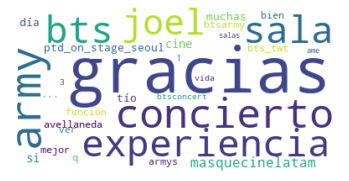

In [66]:
wordcloud = WordCloud(background_color='white', collocations=False, max_words=30).fit_words(freq_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()